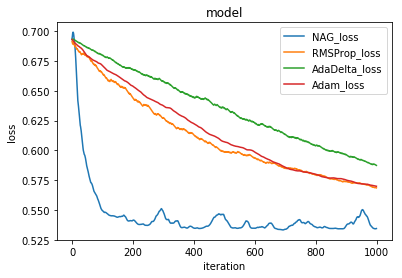

In [3]:
import numpy
import random
import jupyter
import math
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
from matplotlib import pyplot


def f_loss(x, y, w, C, random_i):
	loss = 0
	n = len(random_i)
	for m in range(n):
		loss += math.log(1+math.exp(-y[m]*(x[m,:].dot(w.T))))
	loss = loss/n + C/2 * w.dot(w.T)
	return loss[0,0]

def f_gradient(x, y, w, C):
	gradient = (-y / (1+math.exp(y*x.dot(w.T))))*x + C*w
	return gradient




def NAG_train(x, y, x_test, y_test, w, C, lr, gamma, threshold, iteration):
	vt = numpy.zeros(w.shape)
	lossvalue = []
	testloss = []
	random_index = []
	random_test_index = []
	for i in range(iteration):
		random_num = random.randint(0, x.shape[0]-1)
		random_test_num = random.randint(0, x_test.shape[0]-1)
		random_index.append(random_num)
		random_test_index.append(random_test_num)
	for i in range(iteration):
		gradient = f_gradient(x[random_index[i],:], y[random_index[i]], w-gamma*vt, C)
		vt = gamma*vt - lr*gradient
		w += vt
		loss = f_loss(x, y, w, C, random_index)
		lossvalue.append(loss)
		testloss.append(f_loss(x_test, y_test, w, C, random_test_index))
		if loss < threshold :
			break
	return w, lossvalue, testloss

def RMSProp_train(x, y, x_test, y_test, w, C, lr, gamma, threshold, iteration):
	Gt = 0
	lossvalue = []
	testloss = []
	random_index = []
	random_test_index = []
	for i in range(iteration):
		random_num = random.randint(0, x.shape[0]-1)
		random_test_num = random.randint(0, x_test.shape[0]-1)
		random_index.append(random_num)
		random_test_index.append(random_test_num)
	for i in range(iteration):
		gradient = f_gradient(x[random_index[i],:], y[random_index[i]], w, C)
		Gt = gamma*Gt + (1-gamma)*gradient.dot(gradient.T)
		w -= lr * gradient / math.sqrt(Gt+1e-8)
		loss = f_loss(x, y, w, C, random_index)
		lossvalue.append(loss)
		testloss.append(f_loss(x_test, y_test, w, C, random_test_index))
		if loss < threshold :
			break
	return w, lossvalue, testloss

def AdaDelta_train(x, y, x_test, y_test, w, C, lr, gamma, threshold, iteration):
	Gt = 0
	variable_t = 0
	lossvalue = []
	testloss = []
	random_index = []
	random_test_index = []
	for i in range(iteration):
		random_num = random.randint(0, x.shape[0]-1)
		random_test_num = random.randint(0, x_test.shape[0]-1)
		random_index.append(random_num)
		random_test_index.append(random_test_num)
	for i in range(iteration):
		gradient = f_gradient(x[random_index[i],:], y[random_index[i]], w, C)
		Gt = gamma*Gt + (1-gamma)*gradient.dot(gradient.T)
		variable_w = - math.sqrt(variable_t + 1e-8) * gradient / math.sqrt(Gt + 1e-8)
		w += variable_w
		variable_t = gamma*variable_t + (1-gamma)*variable_w.dot(variable_w.T)
		loss = f_loss(x, y, w, C, random_index)
		lossvalue.append(loss)
		testloss.append(f_loss(x_test, y_test, w, C, random_test_index))
		if loss < threshold :
			break
	return w, lossvalue, testloss

def Adam_train(x, y, x_test, y_test, w, C, lr, gamma, threshold, iteration):
	Gt = 0
	moment = numpy.zeros((1, x.shape[1]))
	B = 0.9
	lossvalue = []
	testloss = []
	random_index = []
	random_test_index = []
	for i in range(iteration):
		random_num = random.randint(0, x.shape[0]-1)
		random_test_num = random.randint(0, x_test.shape[0]-1)
		random_index.append(random_num)
		random_test_index.append(random_test_num)
	for i in range(iteration):
		gradient = f_gradient(x[random_index[i],:], y[random_index[i]], w, C)
		moment = B*moment + (1-B)*gradient
		Gt = gamma*Gt + (1-gamma)*gradient.dot(gradient.T)
		a = lr * math.sqrt(1 - pow(gamma, iteration)) / (1-pow(B, iteration))
		w -= a * moment / math.sqrt(Gt + 1e-8)
		loss = f_loss(x, y, w, C, random_index)
		lossvalue.append(loss)
		testloss.append(f_loss(x_test, y_test, w, C, random_test_index))
		if loss < threshold :
			break
	return w, lossvalue, testloss

x, y_train = load_svmlight_file("F:\\machinelearning\\a9a.txt")
x_train = x.toarray()
x, y_test = load_svmlight_file("F:\\machinelearning\\a9at.txt")
x_test = x.toarray()

X_train = numpy.hstack([x_train, numpy.ones((x_train.shape[0], 1))])
X_test = numpy.hstack([x_test, numpy.zeros((x_test.shape[0], 1))])
X_test = numpy.hstack([X_test, numpy.ones((x_test.shape[0], 1))])

iteration = 1000

# NAG
NAG_w = numpy.zeros((1, X_train.shape[1]))
NAG_w, NAG_loss, NAGtest_loss = NAG_train(X_train, y_train, X_test, y_test, NAG_w, 0.3, 0.001, 0.9, 0.001, iteration)

# RMSProp
RMS_w = numpy.zeros((1, X_train.shape[1]))
RMS_w, RMS_loss, RMStest_loss = RMSProp_train(X_train, y_train, X_test, y_test, RMS_w, 0.3, 0.001, 0.9, 0.001, iteration)

# AdaDelta
AdaDelta_w = numpy.zeros((1, X_train.shape[1]))
AdaDelta_w, AdaDelta_loss, AdaDeltatest_loss = AdaDelta_train(X_train, y_train, X_test, y_test, AdaDelta_w, 0.3, 0.001, 0.9, 0.001, iteration)

# Adam
Adam_w = numpy.zeros((1, X_train.shape[1]))
Adam_w, Adam_loss, Adamtest_loss = Adam_train(X_train, y_train, X_test, y_test, Adam_w, 0.3, 0.001, 0.9, 0.001, iteration)



pyplot.plot(NAGtest_loss, label = 'NAG_loss')

pyplot.plot(RMStest_loss, label = 'RMSProp_loss')

pyplot.plot(AdaDeltatest_loss, label = 'AdaDelta_loss')

pyplot.plot(Adamtest_loss, label = 'Adam_loss')
pyplot.legend(loc='upper right')
pyplot.ylabel('loss')
pyplot.xlabel('iteration')
pyplot.title('model')
pyplot.show()